In [1]:
# movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
# #Removing the parentheses
# movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
# #Removing the years from the 'title' column
# movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
# #Applying the strip function to get rid of any ending whitespace characters that may have appeared
# movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
# movies_df.head()

# movies_df['genres'] = movies_df.genres.str.split('|')
# movies_df.head()

#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
# moviesWithGenres_df = movies_df.copy()
# moviesWithGenres_df

# for index, row in movies_df.iterrows():
#     for genre in row['genres']:
#         moviesWithGenres_df.at[index, genre] = 1

# moviesWithGenres_df = moviesWithGenres_df.fillna(0)
# moviesWithGenres_df.head()

# cosine_sim = cosine_similarity(count_matrix)

In [2]:
# movies

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [41]:
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
# #Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

# Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies_df.copy()
moviesWithGenres_df

for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1

moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.genres

0       [Adventure, Animation, Children, Comedy, Fantasy]
1                          [Adventure, Children, Fantasy]
2                                       [Comedy, Romance]
3                                [Comedy, Drama, Romance]
4                                                [Comedy]
                              ...                        
9737                 [Action, Animation, Comedy, Fantasy]
9738                         [Animation, Comedy, Fantasy]
9739                                              [Drama]
9740                                  [Action, Animation]
9741                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
df = pd.merge(movies_df, ratings_df, on='movieId')
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [6]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [7]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Name: rating, Length: 9719, dtype: int64

In [8]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1
...,...,...
Don't Look Now (1973),0.5,1
Journey 2: The Mysterious Island (2012),0.5,1
Joe Dirt 2: Beautiful Loser (2015),0.5,1


# Data Exploration

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

<function matplotlib.pyplot.show(*args, **kw)>

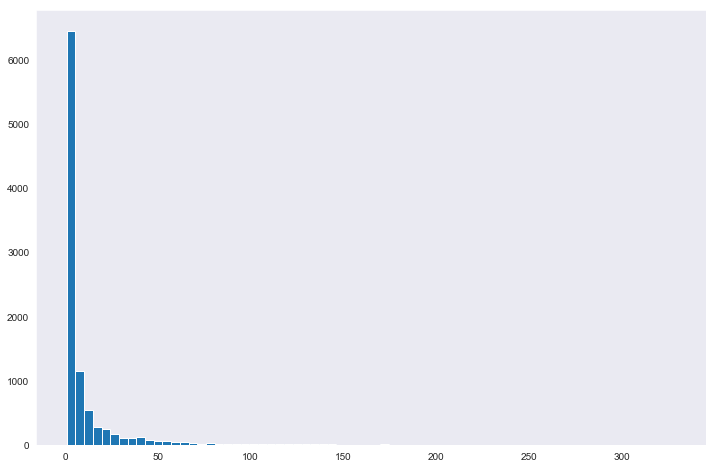

In [10]:
plt.figure(figsize=(12,8))
plt.hist(ratings['number of ratings'], bins=70,)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

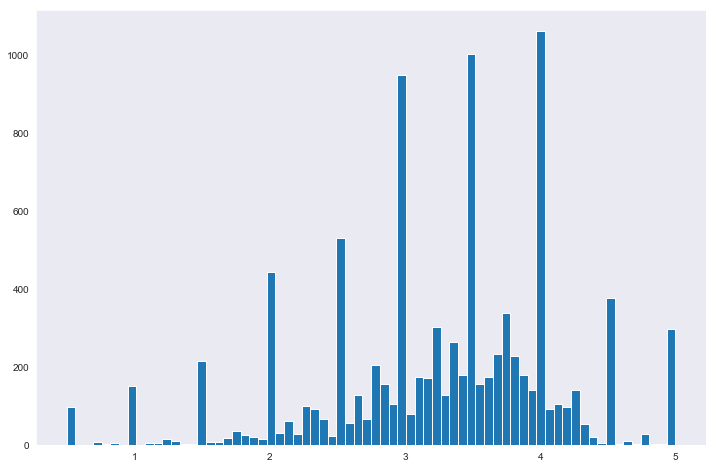

In [11]:
plt.figure(figsize=(12,8))
plt.hist(ratings['rating'], bins=70,)
plt.show

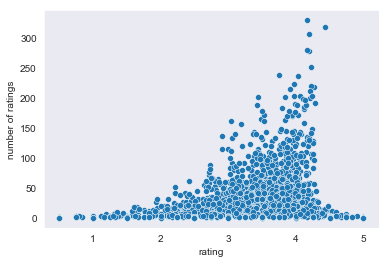

In [12]:
sns.scatterplot(data=ratings, x='rating', y='number of ratings')

In [13]:
# recommendation for a single movie
# we can use content or collaborative filtering to find similar movies at this stage

# Model Deployment

In [42]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [14]:
moviematrix=df.pivot_table(index="userId",columns="title",values='rating')
moviematrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [15]:
toystory_user_ratings = moviematrix['Toy Story (1995)']
toystory_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Toy Story (1995), dtype: float64

In [16]:
similar_to_toystory=moviematrix.corrwith(toystory_user_ratings)    
similar_to_toystory

C:\Users\Kye Manning-Lees\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Kye Manning-Lees\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.333282
xXx (2002)                                  -0.244733
xXx: State of the Union (2005)               0.129969
¡Three Amigos! (1986)                       -0.387202
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [17]:
corr_toystory=pd.DataFrame(similar_to_toystory,columns=['correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0
Brigadoon (1954),1.0
Project X (1987),1.0
Imitation of Life (1959),1.0
Terminal Velocity (1994),1.0


In [18]:
corr_toystory = corr_toystory.join(ratings['number of ratings'])
corr_toystory[corr_toystory['number of ratings']>100].sort_values('correlation',ascending=False)

,correlation,number of ratings
title,,
Toy Story (1995),1.000000,215
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141
Aladdin (1992),0.611892,183
"Monsters, Inc. (2001)",0.490231,132
...,...,...
"Rock, The (1996)",-0.038208,121
Good Will Hunting (1997),-0.044629,141
Interview with the Vampire: The Vampire Chronicles (1994),-0.061637,109


In [20]:
# Content you might also like:

In [19]:
def predict_movies(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['number of ratings'])
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('correlation',ascending=False)
    return predictions

predictions=predict_movies("Toy Story (1995)")  #any movie name from the data set can be put here
predictions.head()

C:\Users\Kye Manning-Lees\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Kye Manning-Lees\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,number of ratings
title,,
Toy Story (1995),1.000000,215
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141
Aladdin (1992),0.611892,183
"Monsters, Inc. (2001)",0.490231,132


In [21]:
# Templates similar to this: